In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('spam.csv',encoding="ISO-8859-1")

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


Steps:-
1. Data cleaning
2. EDA
3. Text preprocessing
4. Model building
5. Evaluation
6. Improvement
7. Wesite
8. Deployy

In [4]:
# Data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True,axis=1)

In [7]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [8]:
df.sample(5)

,target,text
4644,ham,Are you planning to come chennai?
2263,spam,Not heard from U4 a while. Call 4 rude chat pr...
4779,ham,Sen told that he is going to join his uncle fi...
4192,ham,Ok i'm coming home now.
390,ham,Huh so late... Fr dinner?


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
l = LabelEncoder()

In [11]:
df['target'] = l.fit_transform(df['target'])

In [12]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [13]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

# 2. EDA

In [17]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [18]:
from matplotlib import pyplot as plt


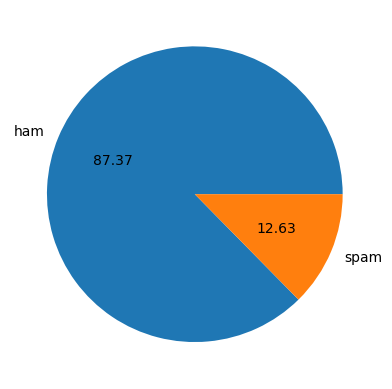

In [19]:
plt.pie(df['target'].value_counts(),autopct='%0.2f',labels=['ham','spam'])
plt.show()

# Data is imblanced

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ankit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
df['num_character'] = df['text'].apply(len)

C:\Users\ankit\AppData\Local\Temp\ipykernel_9168\2418167279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_character'] = df['text'].apply(len)


In [23]:
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\ankit\AppData\Local\Temp\ipykernel_9168\76344806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [25]:
df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\ankit\AppData\Local\Temp\ipykernel_9168\2446049213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [26]:
df.head()

,target,text,num_character,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['num_character','num_words','num_sentence']].describe()

,num_character,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
df.shape

(5169, 5)

In [29]:
# for ham
df[df['target']==0][['num_character','num_words','num_sentence']].describe()

,num_character,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# for spam
df[df['target']==1][['num_character','num_words','num_sentence']].describe()

,num_character,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [31]:
import seaborn as sns

<Axes: xlabel='num_character', ylabel='Count'>

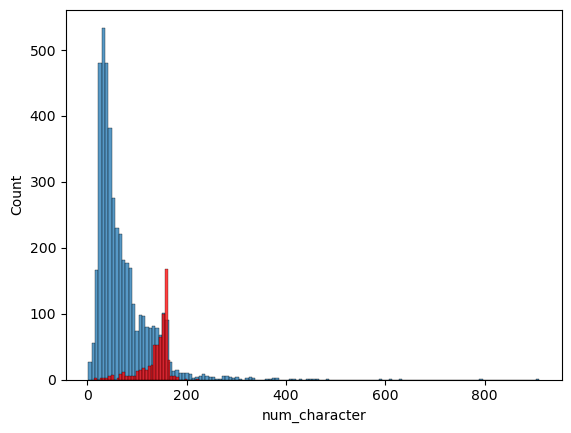

In [32]:
sns.histplot(df[df['target']==0]['num_character'])
sns.histplot(df[df['target']==1]['num_character'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

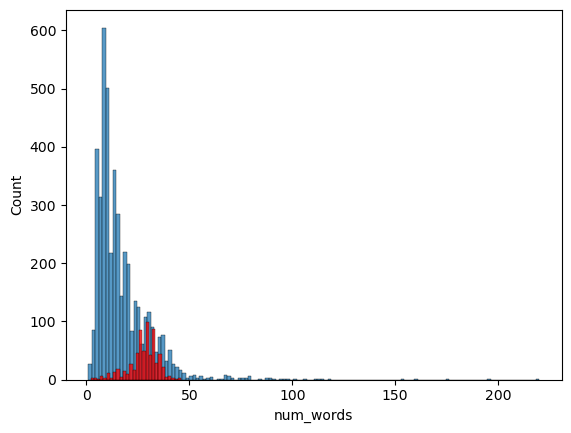

In [33]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

D:\AI\ML\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


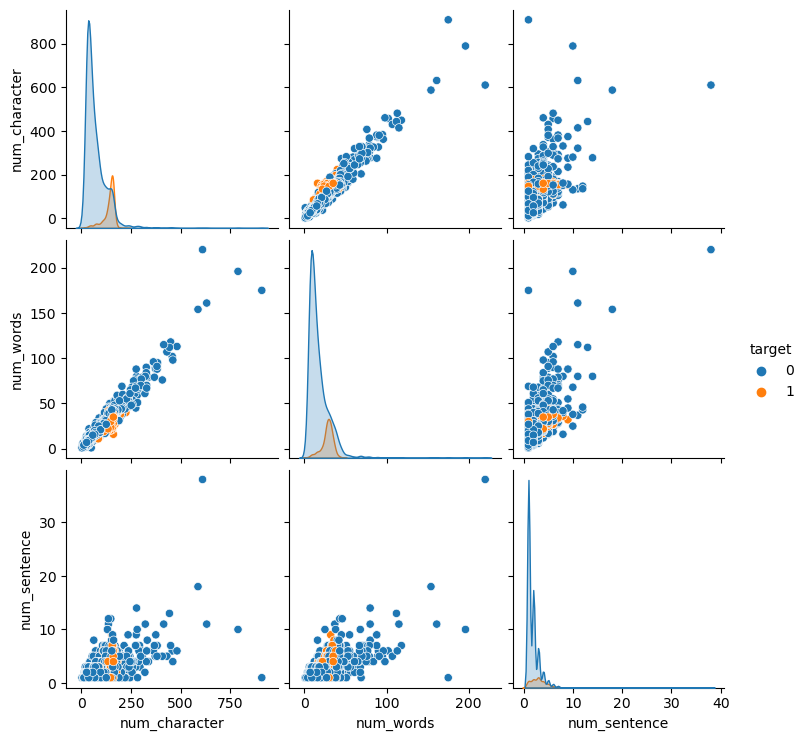

In [34]:
sns.pairplot(df,hue='target')

<Axes: >

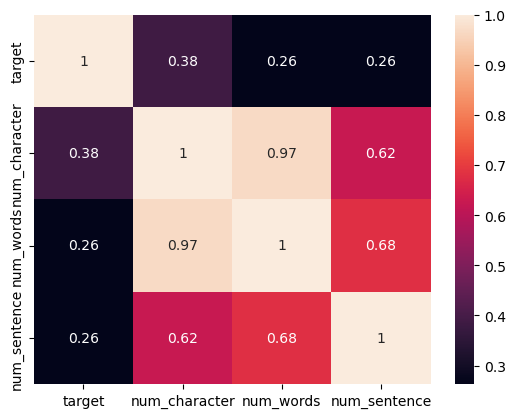

In [35]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

# Here we can keep only one column as the correlation between the columns are very high

# Data preprocessing
1. Lower case
2. Tokenization
3. Removing special character
4. Removing stop words and punctuation
5. Stemming

In [41]:
from nltk.corpus import stopwords
import string

In [42]:
from nltk.stem.porter import PorterStemmer

In [43]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
p = PorterStemmer()

In [45]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ankit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [47]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y =[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(p.stem(i))
        
    
   
            
    return " ".join(y)
            
    

In [48]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\ankit\AppData\Local\Temp\ipykernel_9168\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [49]:
df.head()

,target,text,num_character,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [45]:
# make word cloud
!pip install wordcloud


In [50]:
from wordcloud import WordCloud

In [51]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [52]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

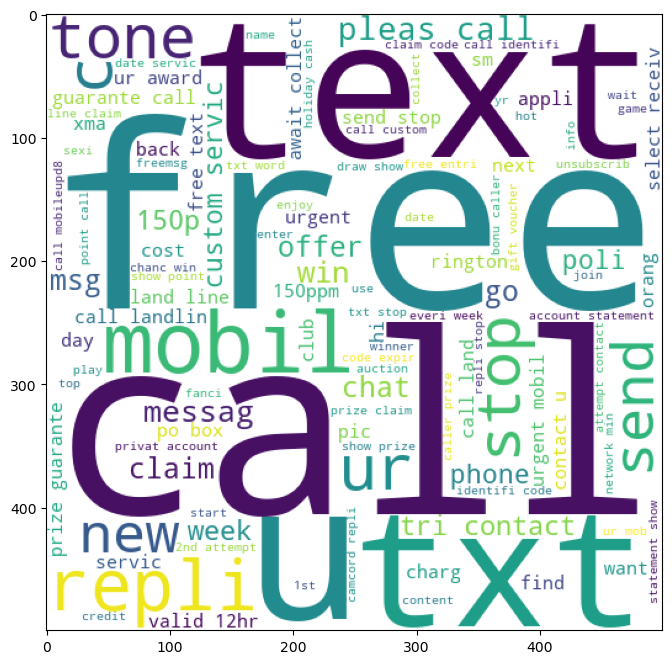

In [53]:
plt.figure(figsize=(12,8))
plt.imshow(spam_wc)

In [54]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

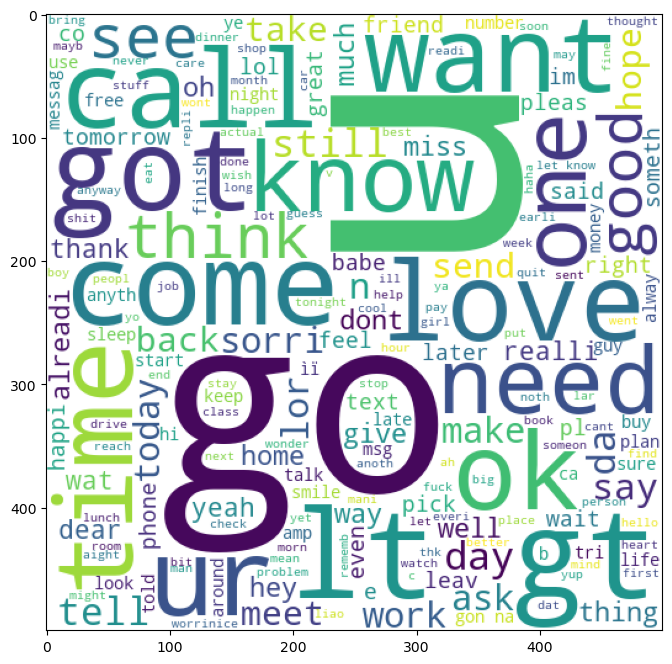

In [55]:
plt.figure(figsize=(12,8))
plt.imshow(ham_wc)

In [56]:
spam_corpus = []
for i in df[df['target']==1]['transformed_text'].tolist():
    for msg in i.split(" "):
        spam_corpus.append(msg)

In [57]:
len(spam_corpus)

9939

In [58]:
from collections import Counter


<BarContainer object of 30 artists>

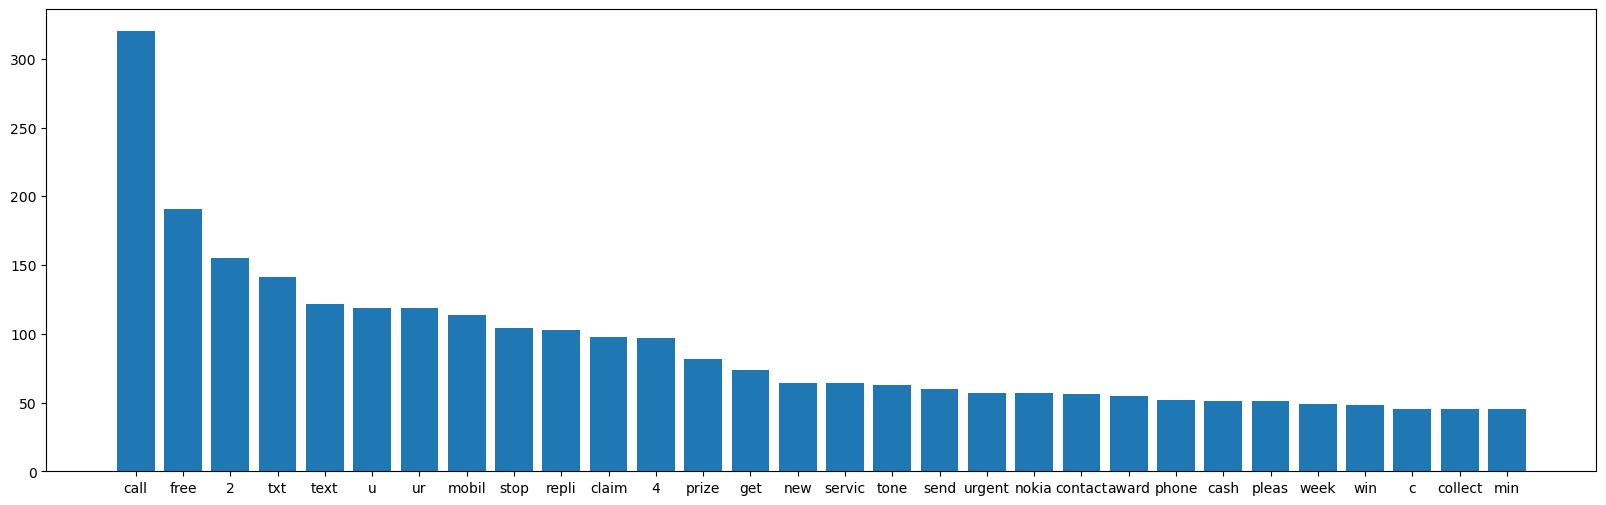

In [59]:
plt.figure(figsize=(20,6))
plt.bar(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

# 4. Model building

In [60]:
# On textual data Naive bayes performance is best

In [154]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
cv = CountVectorizer()

In [155]:
# x = cv.fit_transform(df['transformed_text']).toarray()
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [156]:
x.shape

(5169, 3000)

In [157]:
y = df['target'].values

In [158]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [148]:
# Fore mmodel improvement try scling on x
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# x = scaler.fit_transform(x) # commented as it is not improving the model

In [168]:
# 2. Try to append the num_character column to x
x = np.hstack((x,df['num_character'].values.reshape(-1,1)))
# df['num_character'].values.reshape(-1,1)

In [125]:
from sklearn.model_selection import train_test_split

In [169]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2 , random_state=2)

In [127]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [128]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [129]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [130]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [131]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


# Note
1. Since this dataset is imbalanced so precision score is more matter so we will go with multinomialNB as it's precision score is 1
2. And this come from when we choose tfidf

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [105]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc= DecisionTreeClassifier(max_depth=5)
lrc= LogisticRegression(solver='liblinear',penalty = 'l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc=  ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)


In [106]:
clf = {
    'LR'  : lrc,
    'SVC' : svc,
    'KNC' : knc,
    'MNB' : mnb,
    'DTC' : dtc,
    'RFC' : rfc,
    'ABC' : abc,
    'BGC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt
    
}

In [107]:
def train_classifier(clf,x_train,y_train):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precission = precision_score(y_test,y_pred)
    
    return accuracy,precission

In [108]:
train_classifier(svc,x_train,y_train)

(0.9729206963249516, 0.9741379310344828)

In [179]:
acc_score = []
preci_score = []

def training(x_train,y_train):
    for i , val in clf.items():
        val.fit(x_train,y_train)
        y_pred = val.predict(x_test)
        acc_score.append(accuracy_score(y_test,y_pred))
        preci_score.append(precision_score(y_test,y_pred))
        

In [181]:
training(x_train,y_train)

D:\AI\ML\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [132]:
old_acc_score = acc_score[:]
old_preci_score = preci_score[:]

In [134]:
old_preci_score

[0.94,
 0.9741379310344828,
 1.0,
 1.0,
 0.8380952380952381,
 1.0,
 0.9454545454545454,
 0.8625954198473282,
 0.9824561403508771,
 0.9238095238095239]

In [138]:
old_df = pd.DataFrame({'Algo':clf.keys(),'Accuracy':old_acc_score,'precision':old_preci_score}).sort_values('precision',ascending=False)

In [145]:
# Model imporovement
# 1. Change in the max_feature of tfidf
new_df = pd.concat([old_df,pd.DataFrame({'Accuracy_tfidf_3000':acc_score,'precision_tfidf_3000':preci_score}).sort_values('precision_tfidf_3000',ascending=False)],axis=1)

In [146]:
new_df # MNV accuracy score increase

,Algo,Accuracy,precision,Accuracy_tfidf_3000,precision_tfidf_3000
2,KNC,0.900387,1.000000,0.905222,1.000000
3,MNB,0.959381,1.000000,0.970986,1.000000
5,RFC,0.971954,1.000000,0.975822,0.982906
8,ETC,0.972921,0.982456,0.974855,0.974576
1,SVC,0.972921,0.974138,0.975822,0.974790
6,ABC,0.961315,0.945455,0.960348,0.929204
0,LR,0.951644,0.940000,0.958414,0.970297
9,GBDT,0.952611,0.923810,0.946809,0.919192
7,BGC,0.958414,0.862595,0.958414,0.868217
4,DTC,0.935203,0.838095,0.927466,0.811881


In [171]:
new_df2 = pd.concat([new_df,pd.DataFrame({'Accuracy_after_scling':acc_score,'precision_after_scaling':preci_score}).sort_values('precision_after_scaling',ascending=False)],axis=1)
new_df2

,Algo,Accuracy,precision,Accuracy_tfidf_3000,precision_tfidf_3000,Accuracy_after_scling,precision_after_scaling
2,KNC,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190
3,MNB,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154
5,RFC,0.971954,1.000000,0.975822,0.982906,0.975822,0.982906
8,ETC,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576
1,SVC,0.972921,0.974138,0.975822,0.974790,0.969052,0.927419
6,ABC,0.961315,0.945455,0.960348,0.929204,0.960348,0.929204
0,LR,0.951644,0.940000,0.958414,0.970297,0.967118,0.964286
9,GBDT,0.952611,0.923810,0.946809,0.919192,0.946809,0.919192
7,BGC,0.958414,0.862595,0.958414,0.868217,0.958414,0.868217
4,DTC,0.935203,0.838095,0.927466,0.811881,0.929400,0.828283


# After doing scaling there is no any benifit on precision or accuracy so we remove scaling from our flow

In [183]:
new_df3 = pd.concat([new_df2,pd.DataFrame({'Accuracy_after_num_char':acc_score,'precision_after_num_char':preci_score}).sort_values('precision_after_num_char',ascending=False)],axis=1)

In [184]:
new_df3

,Algo,Accuracy,precision,Accuracy_tfidf_3000,precision_tfidf_3000,Accuracy_after_scling,precision_after_scaling,Accuracy_after_num_char,precision_after_num_char
2,KNC,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190,0.931335,0.801802
3,MNB,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154,0.941006,1.000000
5,RFC,0.971954,1.000000,0.975822,0.982906,0.975822,0.982906,0.969052,0.981818
8,ETC,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576,0.978723,0.975410
1,SVC,0.972921,0.974138,0.975822,0.974790,0.969052,0.927419,0.866538,0.000000
6,ABC,0.961315,0.945455,0.960348,0.929204,0.960348,0.929204,0.964217,0.931624
0,LR,0.951644,0.940000,0.958414,0.970297,0.967118,0.964286,0.961315,0.962264
9,GBDT,0.952611,0.923810,0.946809,0.919192,0.946809,0.919192,0.951644,0.931373
7,BGC,0.958414,0.862595,0.958414,0.868217,0.958414,0.868217,0.966151,0.899225
4,DTC,0.935203,0.838095,0.927466,0.811881,0.929400,0.828283,0.945841,0.886792


# By adding another column there is also no any improvement

In [186]:
# Making pipeline

In [187]:
import pickle


In [188]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
